In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score

from tqdm.autonotebook import tqdm

from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

output_dir = MODEL_DIR/'projections' 

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
metrics_df = pd.read_pickle(DATA_DIR / 'projection_metrics.pickle')
# metrics_df= pd.read_pickle(DATA_DIR / 'projection_metrics_test.pickle')

In [3]:
metrics_df[:3]

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,mnist,umap-learn,2,0.960056,0.518626,"[0.639216248568865, 0.781801993664271, 0.44323..."
1,mnist,direct,2,0.960416,0.519683,"[0.6649555493948871, 0.7389523838324524, 0.464..."
2,mnist,network,2,0.957346,0.555885,"[0.6068383792564549, 0.8137081492037734, 0.522..."


In [4]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [5]:
from IPython.display import display

In [6]:
# load parametric t-SNE / vae / ae
for dataset in datasets:
    for n_components in ["2", "64"]:
        parametric_tsne_save_loc = (
            DATA_DIR
            / "projection_metrics"
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(parametric_tsne_save_loc)
            # display(metric_df)
            metrics_df = pd.concat([metrics_df, metric_df])
        except FileNotFoundError:
            print(parametric_tsne_save_loc)
            
        vae_save_loc = (
            DATA_DIR
            / "projection_metrics"
            / 'vae'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(vae_save_loc)
            # display(metric_df)
            metrics_df = pd.concat([metrics_df, metric_df])
        except FileNotFoundError:
            print(vae_save_loc, 'test')
            
            
        ae_save_loc = (
            DATA_DIR
            / "projection_metrics"
            / 'ae_only'
            / "train"
            / str(n_components)
            / (dataset + ".pickle")
        )
        try:
            metric_df = pd.read_pickle(ae_save_loc)
            # display(metric_df)
            metrics_df = pd.concat([metrics_df, metric_df])
        except FileNotFoundError:
            print(ae_save_loc)

In [7]:
metrics_df.loc[metrics_df.dataset == 'cassins', 'dataset'] = 'cassins_dtw'

In [8]:
metrics_df

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,mnist,umap-learn,2,0.960056,0.518626,"[0.639216248568865, 0.781801993664271, 0.44323..."
1,mnist,direct,2,0.960416,0.519683,"[0.6649555493948871, 0.7389523838324524, 0.464..."
2,mnist,network,2,0.957346,0.555885,"[0.6068383792564549, 0.8137081492037734, 0.522..."
3,mnist,autoencoder,2,0.967531,0.463664,"[0.6270396261421521, 0.6953023558619652, 0.476..."
4,mnist,PCA,2,0.743419,0.022789,"[-0.09352723500727518, 0.5116318676810487, 0.0..."
...,...,...,...,...,...,...
0,mnist,vae,2,0.951298,0.062725,"[-0.4249311765798937, 0.31860124944781043, 0.0..."
0,mnist,ae_only,2,0.966330,-0.025757,"[-0.3541381283065533, -0.4545258305685591, -0...."
0,mnist,parametric-tsne,64,0.999686,0.048800,"[-0.010860901595925445, 0.18013561474196357, 0..."
0,mnist,vae,64,0.999385,0.043106,"[-0.015675610761728787, 0.1729575436763652, 0...."


In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
from tfumap.paths import FIGURE_DIR, save_fig

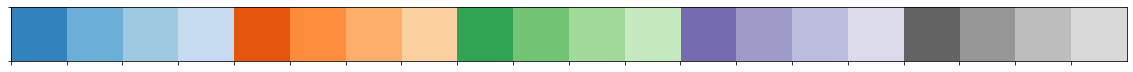

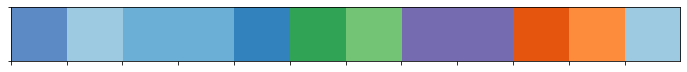

In [12]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "umap-learn": list(np.array(pal20c[3])**4),
    "direct": pal20c[2],
    "AE": pal20c[1],
    "autoencoder": pal20c[1],
    "network": pal20c[0],
    'vae':  pal20c[8], 
    'ae_only':  pal20c[9],
    "pca":  pal20c[12],
    "PCA":  pal20c[12],
    "TSNE": pal20c[4], 
    "parametric-tsne":pal20c[5],
    "network-cpu": pal20c[2],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

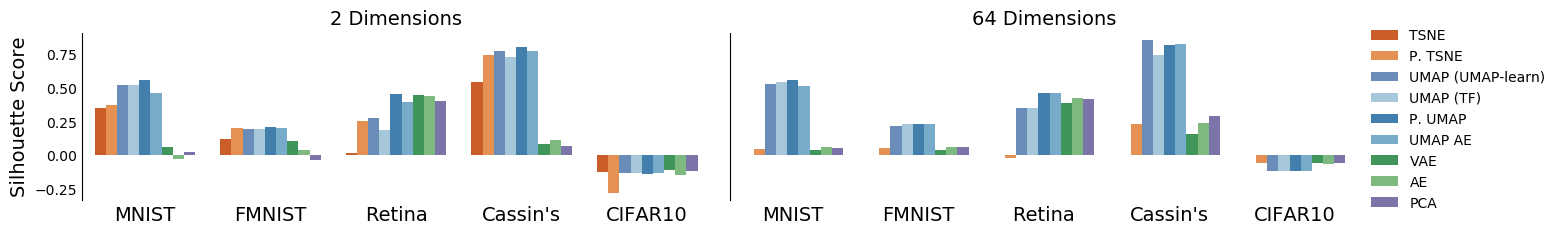

In [99]:
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

hue_list = ["TSNE", "parametric-tsne", "umap-learn", "direct", "network", "autoencoder", 'vae', "ae_only", "PCA"]
fg = sns.catplot(
    x="dataset",
    y="silhouette_score",
    hue="class_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.75, #2.65, 
    aspect=2.5, #3,
    data=metrics_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    
    legend=False
)



(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Silhouette Score")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')

if True:
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')


save_fig(FIGURE_DIR/'silhouette', save_pdf=True, dpi=300)

In [84]:
leg

In [52]:
hue_list = ["TSNE", "parametric-tsne",  "umap-learn", "direct", "network", "autoencoder", 'vae', 'ae_only', "PCA"]

In [53]:
import matplotlib as mpl

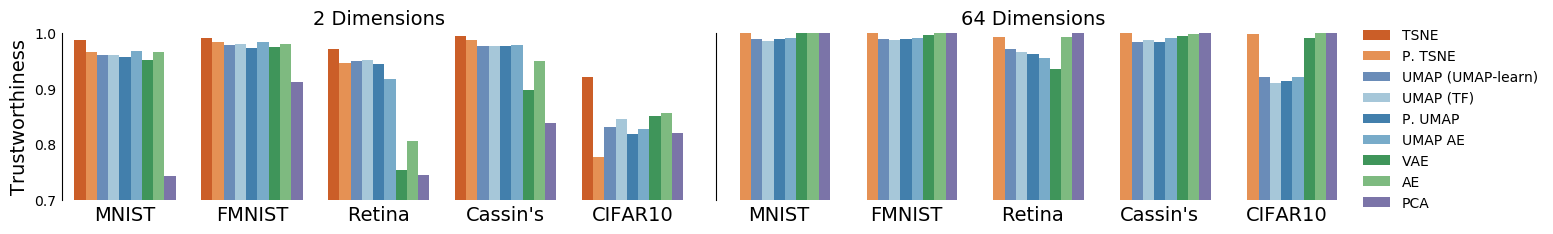

In [98]:
#sns.set(font_scale=1.0)
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

fg = sns.catplot(
    x="dataset",
    y="trustworthiness",
    hue="class_",
    hue_order=hue_list,
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.75, #2.65, 
    aspect=2.5,#3,
    data=metrics_df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    
    legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Trustworthiness")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)


ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')
ax.set_ylim([0.7, 1])
if True:
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1))
else:
    leg = fg._legend
    
leg.get_frame().set_edgecolor('w')
    
leg._legend_title_box._text.set_text("")
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'umap-learn'))[0][0]].set_text('UMAP (UMAP-learn)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'network'))[0][0]].set_text('P. UMAP')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'direct'))[0][0]].set_text('UMAP (TF)')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'ae_only'))[0][0]].set_text('AE')
leg.texts[np.where((np.array([i._text for i in leg.texts]) == 'vae'))[0][0]].set_text('VAE')
#

save_fig(FIGURE_DIR/'trustworthiness', save_pdf=True, dpi=300)


In [38]:
plt.rcParams.update(plt.rcParamsDefault)